In [26]:
using MultivariateStats
using SpecialFunctions
using Plots
using XLSX
using DataFrames
using FFTW
using Statistics

In [3]:
# EXTRACTING OPEN MAGNETIC FLUX AND SUNSPOT NUMBER RECORDS FROM XLSX FILE

# Define DataFrame object
data = DataFrame(
  year = Int[],
  open_magn_flux = Float64[],
  open_magn_flux_err = Float64[],
  ssa_open_magn_flux = Float64[],
  sunspots_num = Float64[],
  sunspots_err = Float64[],
  ssa_sunspots = Float64[]
)

# Open file and for each row write data into the DataFrame
XLSX.openxlsx("SN Usoskin Brehm.xlsx") do file
  sheet = file["Data"] 

  for row in XLSX.eachrow(sheet)
    if isa(row[2], Number)
      push!(data, (
        year = row[2],
        open_magn_flux = row[3],
        open_magn_flux_err = row[4],
        ssa_open_magn_flux = row[5],
        sunspots_num = row[7],
        sunspots_err = row[8],
        ssa_sunspots = row[9]
      ))
    end
  end
end

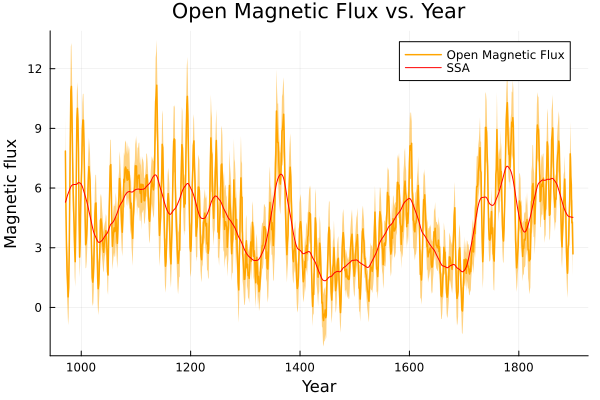

In [4]:
# PLOTTING OF THE OPEN MAGNETIC FLUX RECORDS FROM 971 TO 1899 (AD)

Plots.plot(data.year, data.open_magn_flux, ribbon = data.open_magn_flux_err, xlabel = "Year", ylabel = "Magnetic flux", 
    title = "Open Magnetic Flux vs. Year", label = "Open Magnetic Flux", linewidth = 1.5, color = "orange")
Plots.plot!(data.year, data.ssa_open_magn_flux, label = "SSA", linewidth = 1, color = "red")

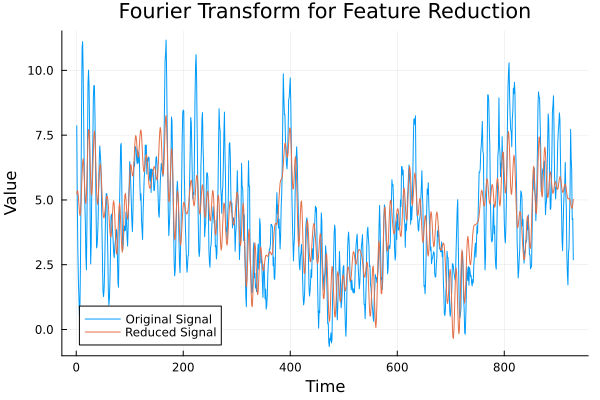

In [35]:
using FFTW
using Plots

# Assuming `data` is a DataFrame and `data.open_magn_flux` is your time series vector
signal = data.open_magn_flux

# Compute the Fourier Transform
signal_fft = fft(signal)

# Determine the number of frequencies to retain
num_frequencies_to_keep = round(Int, 0.03 * length(signal_fft))  # Retain 10% of the frequencies

# Get the indices of the largest magnitudes
sorted_indices = sortperm(abs.(signal_fft), rev=true)
significant_indices = sorted_indices[1:num_frequencies_to_keep]

# Create a mask to retain only the significant frequencies
mask = zeros(Complex{Float64}, length(signal_fft))
mask[significant_indices] .= signal_fft[significant_indices]

# Inverse FFT to reconstruct the signal with reduced features
signal_reduced = real(ifft(mask))

# Plot the original and reduced signals
plot(signal, label="Original Signal", xlabel="Time", ylabel="Value", title="Fourier Transform for Feature Reduction")
plot!(signal_reduced, label="Reduced Signal")

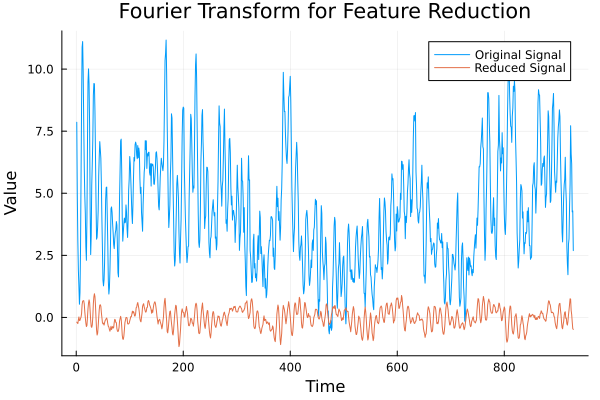

In [99]:
using FFTW
using Plots
using Random

# Assuming `data` is a DataFrame and `data.open_magn_flux` is your time series vector
signal = data.open_magn_flux

# Compute the Fourier Transform
signal_fft = fft(signal)

# Number of random frequencies to retain
num_random_frequencies_to_keep = 50

# Get the total number of frequencies
total_frequencies = length(signal_fft)

# Generate random indices to keep
random_indices = randperm(total_frequencies)[1:num_random_frequencies_to_keep]

# Create a mask to retain only the random frequencies
mask = zeros(Complex{Float64}, total_frequencies)
mask[random_indices] .= signal_fft[random_indices]

# Inverse FFT to reconstruct the signal with reduced features
signal_reduced = real(ifft(mask))

# Plot the original and reduced signals
plot(signal, label="Original Signal", xlabel="Time", ylabel="Value", title="Fourier Transform for Feature Reduction")
plot!(signal_reduced, label="Reduced Signal")

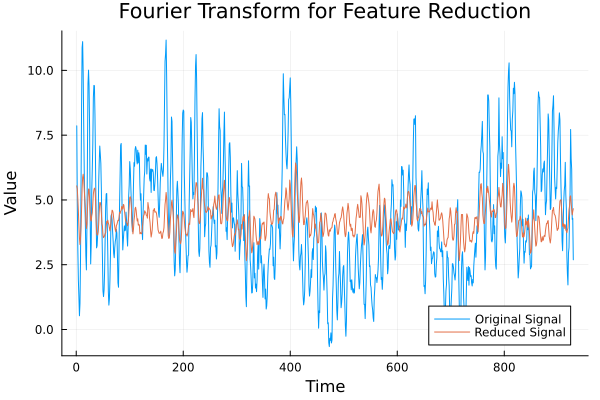

In [107]:
using FFTW
using Plots

# Assuming `data` is a DataFrame and `data.open_magn_flux` is your time series vector
signal = data.open_magn_flux

# Compute the Fourier Transform
signal_fft = fft(signal)

# Create a mask to retain only every sixth frequency
mask = zeros(Complex{Float64}, length(signal_fft))
mask[1:7:end] .= signal_fft[1:7:end]

# Inverse FFT to reconstruct the signal with reduced features
signal_reduced = real(ifft(mask))

# Plot the original and reduced signals
plot(signal, label="Original Signal", xlabel="Time", ylabel="Value", title="Fourier Transform for Feature Reduction")
plot!(signal_reduced, label="Reduced Signal")

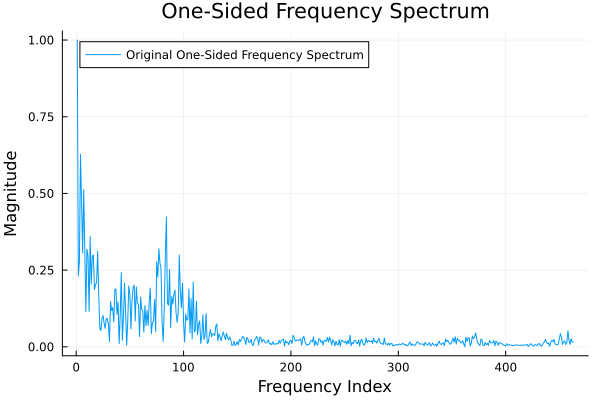

In [121]:
# Assuming `data` is a DataFrame and `data.open_magn_flux` is your time series vector
signal = data.open_magn_flux

# Compute the Fourier Transform
signal_fft = fft(signal)

# Calculate the magnitudes of the frequencies
frequencies = abs.(signal_fft)

# Get the one-sided spectrum
half_length = length(frequencies) ÷ 2
one_sided_frequencies = frequencies[2:half_length]

# Normalize the frequencies by the maximum magnitude
normalized_one_sided_frequencies_max = one_sided_frequencies ./ maximum(one_sided_frequencies)

# Plot the original one-sided frequency spectrum
plot(normalized_one_sided_frequencies_max, label="Original One-Sided Frequency Spectrum", xlabel="Frequency Index", ylabel="Magnitude", title="One-Sided Frequency Spectrum", legend=:topleft)

# Plot the normalized one-sided frequency spectrum
#plot!(normalized_one_sided_frequencies_max, label="Normalized by Max")

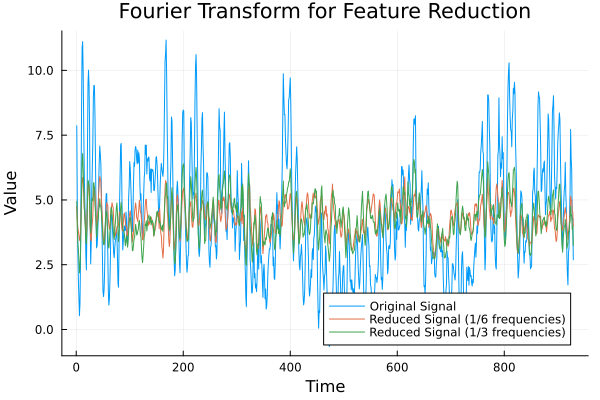

In [123]:
# Retain only every sixth frequency
mask_6 = zeros(Complex{Float64}, length(signal_fft))
mask_6[1:6:end] .= signal_fft[1:6:end]

# Inverse FFT to reconstruct the signal with reduced features
signal_reduced_6 = real(ifft(mask_6))

# Retain every third frequency as a comparison
mask_3 = zeros(Complex{Float64}, length(signal_fft))
mask_3[1:3:end] .= signal_fft[1:3:end]
signal_reduced_3 = real(ifft(mask_3))

# Plot the original and reduced signals
plot(signal, label="Original Signal", xlabel="Time", ylabel="Value", title="Fourier Transform for Feature Reduction")
plot!(signal_reduced_6, label="Reduced Signal (1/6 frequencies)")
plot!(signal_reduced_3, label="Reduced Signal (1/3 frequencies)")

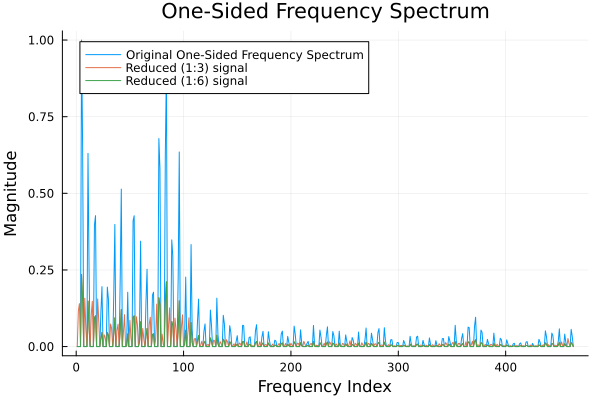

In [126]:
signal = data.open_magn_flux
signal_fft = fft(signal)
frequencies = abs.(signal_fft)
half_length = length(frequencies) ÷ 2
one_sided_frequencies_1 = frequencies[2:half_length]
normalized_one_sided_frequencies_max = one_sided_frequencies ./ maximum(one_sided_frequencies)
plot(normalized_one_sided_frequencies_max, label="Original One-Sided Frequency Spectrum", xlabel="Frequency Index", ylabel="Magnitude", title="One-Sided Frequency Spectrum", legend=:topleft)

signal = signal_reduced_3
signal_fft = fft(signal)
frequencies = abs.(signal_fft)
half_length = length(frequencies) ÷ 2
one_sided_frequencies = frequencies[2:half_length]
normalized_one_sided_frequencies_max = one_sided_frequencies ./ maximum(one_sided_frequencies_1)
plot!(normalized_one_sided_frequencies_max, label="Reduced (1:3) signal")

signal = signal_reduced_6
signal_fft = fft(signal)
frequencies = abs.(signal_fft)
half_length = length(frequencies) ÷ 2
one_sided_frequencies = frequencies[2:half_length]
normalized_one_sided_frequencies_max = one_sided_frequencies ./ maximum(one_sided_frequencies_1)
plot!(normalized_one_sided_frequencies_max, label="Reduced (1:6) signal")